# Maximizing Concentration of an Intermediate in a Batch Reactor using solve_ivp

https://jckantor.github.io/ND-Pyomo-Cookbook/notebooks/06.02-Maximizing-Concentration-of-an-Intermediate-in-a-Batch-Reactor.html

In [1]:
from scipy.integrate import solve_ivp
from scipy.optimize import minimize_scalar
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

Concentration CB has maximum 1.3373856928891767 moles/liter at time [4.02586345] minutes.


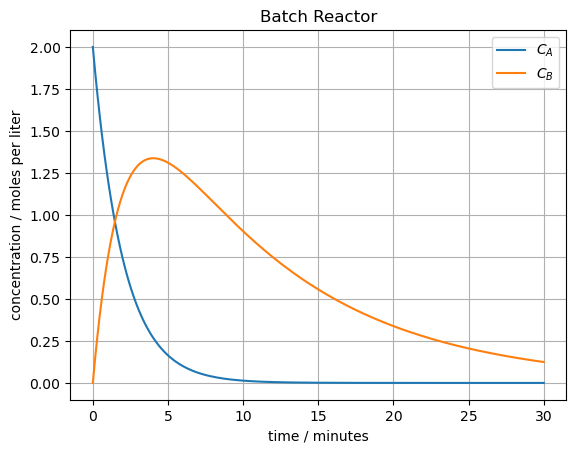

In [2]:
V = 40     # liters
kA = 0.5   # 1/min
kB = 0.1   # l/min
CAf = 2.0  # moles/liter

def batch(t, y):
    
    CA, CB = y
    dCA_dt = -kA*CA
    dCB_dt = kA*CA - kB*CB
    
    return np.array([dCA_dt, dCB_dt])

t = np.linspace(0, 30, 200)

soln = solve_ivp(batch, (0, V), [CAf, 0], t_eval = t)

plt.plot(t, soln.y[0])
plt.plot(t, soln.y[1])
plt.xlabel('time / minutes')
plt.ylabel('concentration / moles per liter')
plt.title('Batch Reactor')
plt.legend(['$C_A$','$C_B$'])
plt.grid(True)

def CB(x):
    
    # to find the maximum value, we first write a function to compute CB for any value of time.
    t = x[0]
    
    soln = solve_ivp(batch, (0, t), [CAf, 0])
    
    y = soln.y[:, -1]
    
    CA = y[0]
    CB = y[1]
    
    return -CB

sol_bounded = minimize(CB, np.array([10]), method="SLSQP", bounds= [(0, 50)])
print('Concentration CB has maximum', -CB(sol_bounded.x), 'moles/liter at time', sol_bounded.x, 'minutes.')